# Data Visualization

---

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/pa-cherry-leaves/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/pa-cherry-leaves'

### Set input directores

Section 1 content

In [4]:
my_data_dir = 'inputs/cherry-leaves-dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Set output directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

### Set the labels:


In [7]:
labels = os.listdir(train_path)
print('Label for the images:', labels)

Label for the images: ['healthy', 'powdery_mildew']


---

# Image shape

Compute average images size on train set.

0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092.JPG
0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_180deg.JPG
002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG
0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG
0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_flipTB.JPG
005f183c-0a73-4738-91f7-c0a0e02cd9e3___JR_HL 9679.JPG
0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG
0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277_180deg.JPG
00a8e886-d172-4261-85e2-780b3c50ad4d___JR_HL 4156.JPG
011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165.JPG
011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_180deg.JPG
011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_flipTB.JPG
014161fb-3c15-414b-9af3-00cb51a11d7c___JR_HL 9842.JPG
02818f40-58e6-4c7d-bfbc-372d89b2045b___JR_HL 4259.JPG
02818f40-58e6-4c7d-bfbc-372d89b2045b___JR_HL 4259_flipTB.JPG
02a7466b-4847-4a18-bbd9-f0278e7b8d20___JR_HL 9582.JPG
02d14b15-897d-4081-8953-e7d83189cff4___JR_HL 9723.JPG
036b575a-cbe7-45a4-8b97-15b7ecdf3

1f68997e-0811-41e3-9414-cb242798e96c___JR_HL 9795.JPG
1f749c6c-30ae-42f3-b591-eac83771b77d___JR_HL 9534.JPG
1ffc094d-131a-481d-a888-0965c3da7e65___JR_HL 9883 copy.JPG
204b913d-7c61-43aa-a805-69dd7bd19933___JR_HL 3924.JPG
204b913d-7c61-43aa-a805-69dd7bd19933___JR_HL 3924_180deg.JPG
204b913d-7c61-43aa-a805-69dd7bd19933___JR_HL 3924_flipTB.JPG
2090ddbb-9efc-4954-8971-432fa56dbd6f___JR_HL 4269.JPG
2090ddbb-9efc-4954-8971-432fa56dbd6f___JR_HL 4269_180deg.JPG
2090ddbb-9efc-4954-8971-432fa56dbd6f___JR_HL 4269_flipTB.JPG
21910dbe-fd1f-4fd3-8925-9e006147455e___JR_HL 9739.JPG
21910dbe-fd1f-4fd3-8925-9e006147455e___JR_HL 9739_flipTB.JPG
21d09e46-a1f7-447b-8b15-2e48fb914825___JR_HL 9593.JPG
21d09e46-a1f7-447b-8b15-2e48fb914825___JR_HL 9593_flipTB.JPG
220a359f-3d06-41fe-9c8d-e5da7d5c426f___JR_HL 4308.JPG
220a359f-3d06-41fe-9c8d-e5da7d5c426f___JR_HL 4308_flipTB.JPG
22211122-0939-4bf9-b006-acf797767aff___JR_HL 9644.JPG
22211122-0939-4bf9-b006-acf797767aff___JR_HL 9644_180deg.JPG
229c7cc9-9dd9-4db0-af

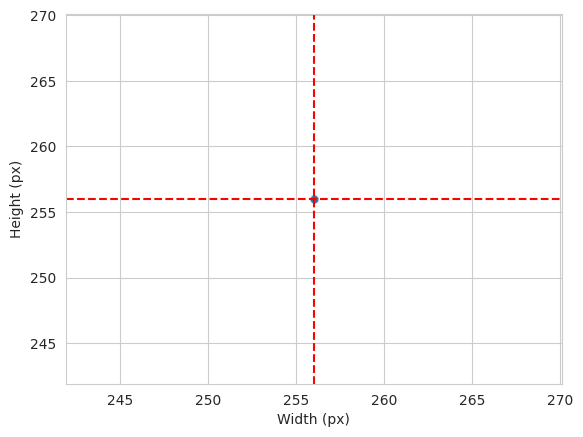

Width av: 256 
Height av: 256


In [22]:
dim1, dim2 = [],[]
for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        print(image_filename)
        img = imread(train_path + '/' + label + '/' + image_filename)
        d1, d2, colors = img.shape
        dim1.append(d1)
        dim2.append(d2)

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (px)")
axes.set_ylabel("Height (px)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')

plt.show()
print(f'Width av: {dim2_mean} \nHeight av: {dim1_mean}')

In [23]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape

joblib.dump(value=image_shape, filename=f'{file_path}/image_shape.pk1')

['outputs/v1/image_shape.pk1']

In [34]:
from tensorflow.keras.preprocessing import image

def load_image_as_array(my_data_dir, new_size=(50, 50), n_images_per_label=20):
    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    labels = os.listdir(my_data_dir)

    for label in labels:
        counter = 0
        for image_filename in os.listdir(my_data_dir + '/' + label):
            if counter < n_images_per_label:
                img = image.load_img(
                    my_data_dir + '/' + label + '/' + image_filename, target_size=new_size)
                if image.img_to_array(img).max() > 1:
                    img_resized = image.img_to_array(img) / 255
                else:
                    img_resized = image.img_to_array(img)

                X = np.append(X, img_resized).reshape(-1, new_size[0], new_size[1], img_resized.shape[2])
                y = np.append(y, label)
                counter += 1

    return X, y



Load image shapes and labels in an array

In [36]:
X, y = load_image_as_array(my_data_dir=train_path,
                           new_size=image_shape,
                           n_images_per_label=30)
print(X.shape, y.shape)

(60, 256, 256, 3) (60,)


Plot and save mean and variability of images per label

In [37]:
def plot_mean_variability_per_labels(X, y, figsize=(12, 5), save_image=False):

    for label_to_display in np.unique(y):
        sns.set_style("white")

        y = y.reshape(-1, 1, 1)
        boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
        arr = X[boolean_mask]

        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)
        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average image for label {label_to_display}")
        axes[0].imshow(avg_img, cmap='gray')
        axes[1].set_title(f"Variability image for label {label_to_display}")
        axes[1].imshow(std_img, cmap='gray')

        if save_image:
            plt.savefig(f'{file_path}/avg_var_{label_to_display}.png',
                        bbox_inches='tight', dpi=150)
        else:
            plt_tight_layout()
            plt.show()
            print('\n')


==== Label healthy ====
Image Shape: (256, 256, 3)
==== Label powdery_mildew ====
Image Shape: (256, 256, 3)


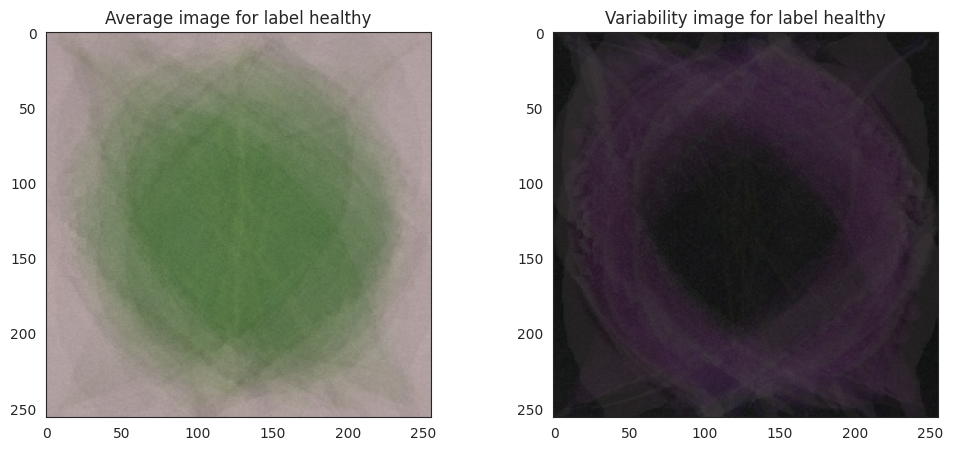

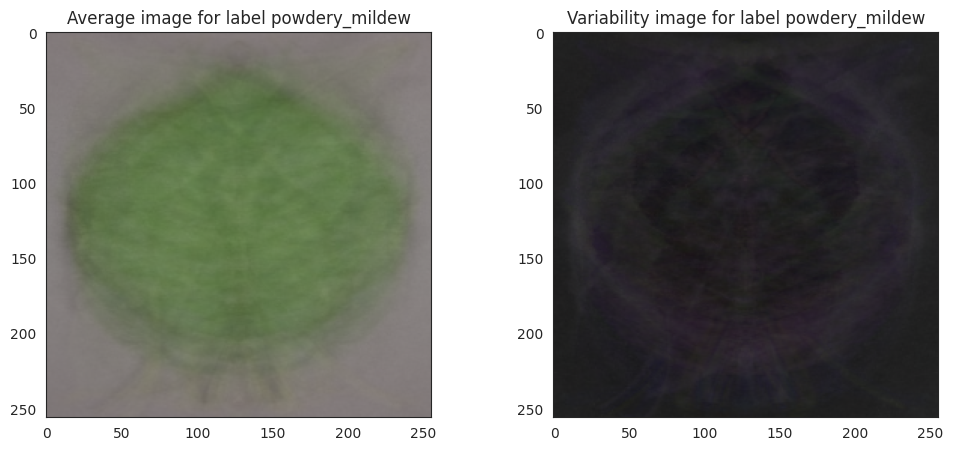

In [38]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True)

### Difference between mildew-affected leaves and healthy leaves

In [39]:
def subset_image_label(X, y, label_to_display):
    y = y.reshape(-1, 1, 1)
    boolean_mask = np.any(y==label_to_display, axis=1).reshape(-1)
    df = X[boolean_mask]
    return df

def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2, figsize=(20, 5), save_image=False):
    sns.set_style("white")

    if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
        print(
            f"Either label {label} or label {label_2}, are not in {np.unique(y)} ")
        return

    images_label = subset_image_label(X, y, label_1)
    label1_avg = np.mean(images_label, axis=0)

    images_label = subset_image_label(X, y, label_2)
    label2_avg = np.mean(images_label, axis=0)

    difference_mean = label1_avg - label2_avg
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    axes[0].imshow(label1_avg, cmap='gray')
    axes[0].set_title(f'Average {label_1}')
    axes[1].imshow(label2_avg, cmap='gray')
    axes[1].set_title(f'Average {label_2}')
    axes[2].imshow(difference_mean, cmap='gray')
    axes[2].set_title(f'Difference image: Avg {label_1} & {label_2}')
    if save_image:
        plt.savefig(f"{file_path}/avg_diff.png", bbox_inches='tight', dpi=150)
    else:
        plt.tight_layout()
        plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


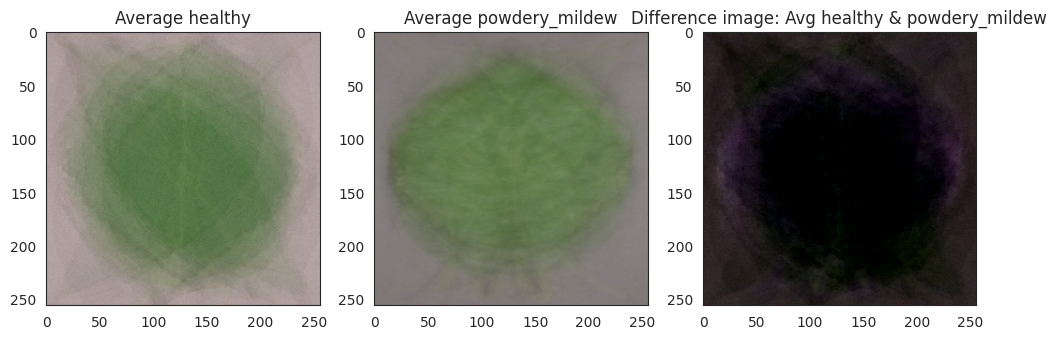

In [40]:
diff_bet_avg_image_labels_data_as_array(X=X, y=y,
                                        label_1='healthy', label_2='powdery_mildew',
                                        figsize=(12, 10),
                                        save_image=True
                                        )

# Image Montage

In [44]:
import itertools
import random
sns.set_style("white")


def image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15, 10)):
    """
    if the label exists in the directory
    check if your montage space is greater than the subset size
    create a list of axes indices based on nrows and ncols
    create a Figure and display images
    in this loop, load and plot the given image
    """

    labels = os.listdir(dir_path)

    # subset the class you are interested to display
    if label_to_display in labels:

        # checks if your montage space is greater than the subset size
        images_list = os.listdir(dir_path + '/' + label_to_display)
        if nrows * ncols < len(images_list):
            img_idx = random.sample(images_list, nrows * ncols)
        else:
            print(
                f"Decrease nrows or ncols to create your montage. \n"
                f"There are {len(images_list)} in your subset. "
                f"You requested a montage with {nrows * ncols} spaces")
            return

        # create a list of axes indices based on nrows and ncols
        list_rows = range(0, nrows)
        list_cols = range(0, ncols)
        plot_idx = list(itertools.product(list_rows, list_cols))

        # create a Figure and display images
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        for x in range(0, nrows*ncols):
            img = imread(dir_path + '/' + label_to_display + '/' + img_idx[x])
            img_shape = img.shape
            axes[plot_idx[x][0], plot_idx[x][1]].imshow(img)
            
            axes[plot_idx[x][0], plot_idx[x][1]].set_xticks([])
            axes[plot_idx[x][0], plot_idx[x][1]].set_yticks([])
        plt.tight_layout()
        plt.show()

    else:
        print("The label you selected doesn't exist.")
        print(f"The existing options are: {labels}")

healthy


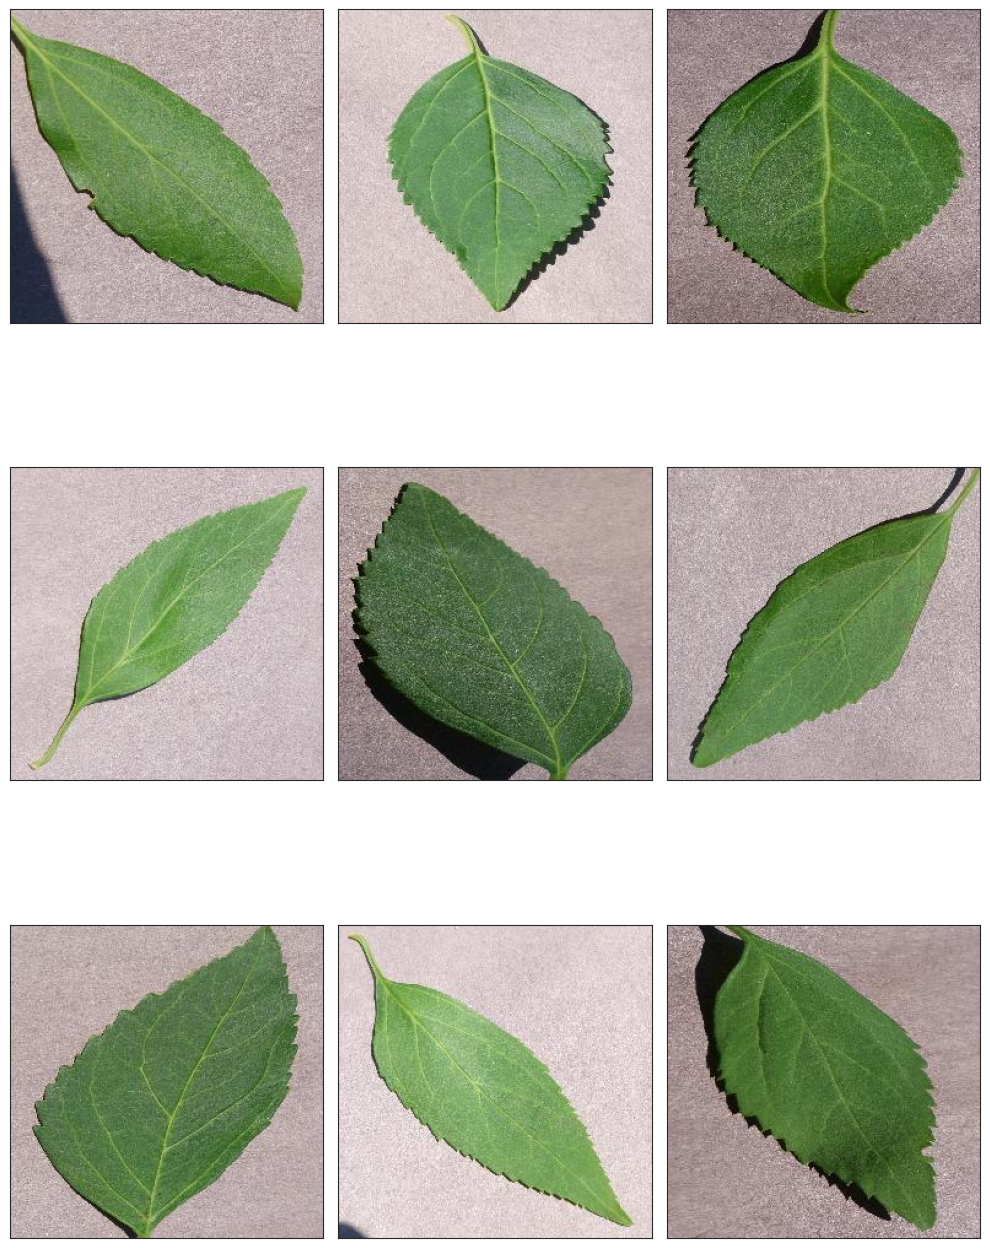



powdery_mildew


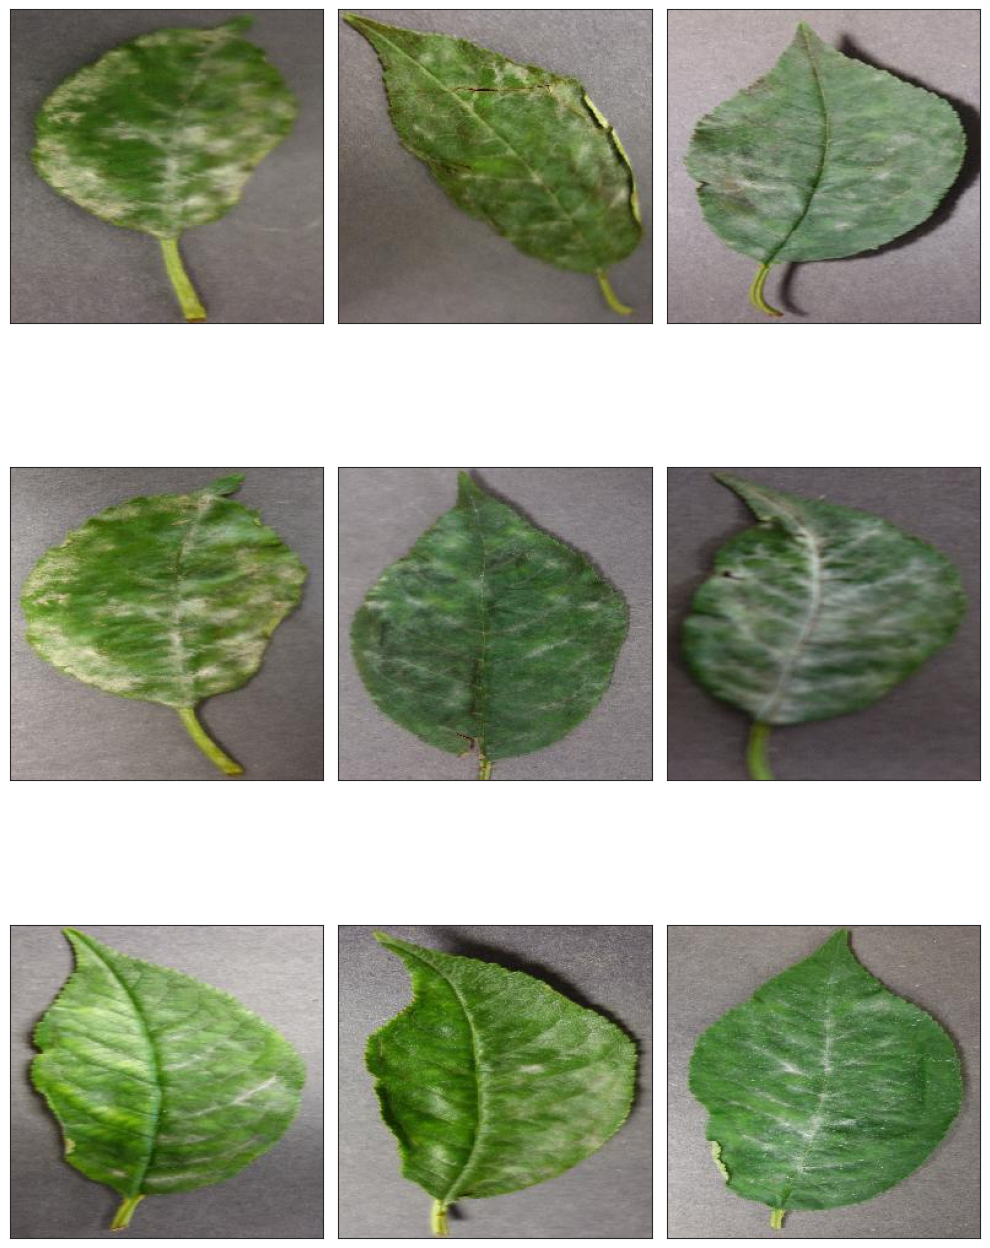

In [45]:
for label in labels:
    print(label)
    image_montage(dir_path=train_path,
                  label_to_display=label,
                  nrows=3, ncols=3,
                  figsize=(10, 15)
                  )
    print("\n")